In [34]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/home/inaya/Downloads


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
from sklearn import linear_model



In [36]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [37]:
reg = linear_model.LinearRegression()
reg.fit(df[["Mileage"]],df["Sell Price($)"])

LinearRegression()

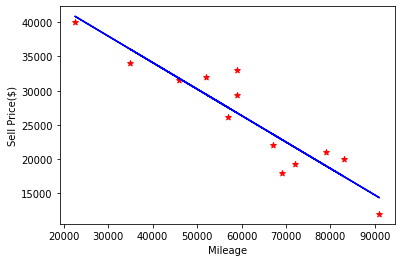

In [38]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df.Mileage, df["Sell Price($)"], color = 'red', marker ='*')
plt.plot(df.Mileage,reg.predict(df[["Mileage"]]),color = 'blue')

In [39]:
dummies= pd.get_dummies(df["Car Model"])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [40]:
merged = pd.concat([df,dummies], axis = 'columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [41]:
final = merged.drop(['Car Model', 'Audi A5', 'Age(yrs)'], axis = 'columns')
final

,Mileage,Sell Price($),BMW X5,Mercedez Benz C class
0,69000,18000,1,0
1,35000,34000,1,0
2,57000,26100,1,0
3,22500,40000,1,0
4,46000,31500,1,0
5,59000,29400,0,0
6,52000,32000,0,0
7,72000,19300,0,0
8,91000,12000,0,0
9,67000,22000,0,1


In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
X = final.drop('Sell Price($)', axis = 'columns')
X

,Mileage,BMW X5,Mercedez Benz C class
0,69000,1,0
1,35000,1,0
2,57000,1,0
3,22500,1,0
4,46000,1,0
5,59000,0,0
6,52000,0,0
7,72000,0,0
8,91000,0,0
9,67000,0,1


In [44]:
y = final.drop('Mileage', axis = 'columns')
y

,Sell Price($),BMW X5,Mercedez Benz C class
0,18000,1,0
1,34000,1,0
2,26100,1,0
3,40000,1,0
4,31500,1,0
5,29400,0,0
6,32000,0,0
7,19300,0,0
8,12000,0,0
9,22000,0,1


In [45]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [46]:
model.fit(X,y)

LinearRegression()

In [47]:
model.score(X,y)

0.9407475372588112

In [48]:
#model.predict([[45000,4,0,1]])

In [49]:
#model.predict([[86000,7,1,0]])

In [50]:
model.score(X,y)

0.9407475372588112

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
dfle = df
dfle["Car Model"] = le.fit_transform(dfle["Car Model"])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [53]:
X = dfle[['Car Model','Mileage']].values
X

array([[    1, 69000],
       [    1, 35000],
       [    1, 57000],
       [    1, 22500],
       [    1, 46000],
       [    0, 59000],
       [    0, 52000],
       [    0, 72000],
       [    0, 91000],
       [    2, 67000],
       [    2, 83000],
       [    2, 79000],
       [    2, 59000]])

In [54]:
y = dfle["Car Model"].values
y

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder = 'passthrough')

In [56]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04]])

In [57]:
X =X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04],
       [1.00e+00, 0.00e+00, 3.50e+04],
       [1.00e+00, 0.00e+00, 5.70e+04],
       [1.00e+00, 0.00e+00, 2.25e+04],
       [1.00e+00, 0.00e+00, 4.60e+04],
       [0.00e+00, 0.00e+00, 5.90e+04],
       [0.00e+00, 0.00e+00, 5.20e+04],
       [0.00e+00, 0.00e+00, 7.20e+04],
       [0.00e+00, 0.00e+00, 9.10e+04],
       [0.00e+00, 1.00e+00, 6.70e+04],
       [0.00e+00, 1.00e+00, 8.30e+04],
       [0.00e+00, 1.00e+00, 7.90e+04],
       [0.00e+00, 1.00e+00, 5.90e+04]])

In [58]:
model.fit(X,y)

LinearRegression()

In [59]:
model.predict([[45000,0,1]])

array([44999.99999947])

In [60]:
model.predict([[86000,1,0]])

array([86001.999999])

In [61]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)


1.0

In [62]:
reg.coef_

array([1., 2., 0.])

In [63]:
reg.intercept_

4.61053417666335e-12

In [64]:
model.predict([[86000,7,0,1]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)